### **Organize publicly available data about startups turned unicorns.**
#### In venture capital, a unicorn company is a privately-held startup company that is valued at more than $1 billion. <br> It’s a term that’s become common in the investing community.

To load and visualize the data, we can use the Pandas and Bokeh library

In [80]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

Read the cleaned dataset present in '../dataset/' directory

In [82]:
# Read the dataset using read_csv function
df_all = pd.read_csv('../dataset/all_unicorns.csv')

Transform and organize the data, to make them ready for visualization

In [83]:
# Strip the $ sign from the valuation column
df_all['Valuation ($B)'] = df_all['Valuation ($B)'].str.replace('$','')
# Convert the column values from object to float64
df_all['Valuation ($B)'] = pd.to_numeric(df_all['Valuation ($B)'])
# Convert the 'Date Joined' column values into datatime64[ns] format
df_all['Date Joined'] = pd.to_datetime(df_all['Date Joined'])
# Sort the companies in descending order of valuation
df_all.sort_values(['Valuation ($B)'], ascending=[0])
df_all.drop(['Unnamed: 0'], axis=1, inplace=True)
df_all.head()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19472\1686406063.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_all['Valuation ($B)'] = df_all['Valuation ($B)'].str.replace('$','')


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,125.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."


#### Use seaborn to plot all the unicorn companies valuation.
Target : Visualize the vast diffrences in valuation amount (10 largest funded vs 10 smallest funded companies)

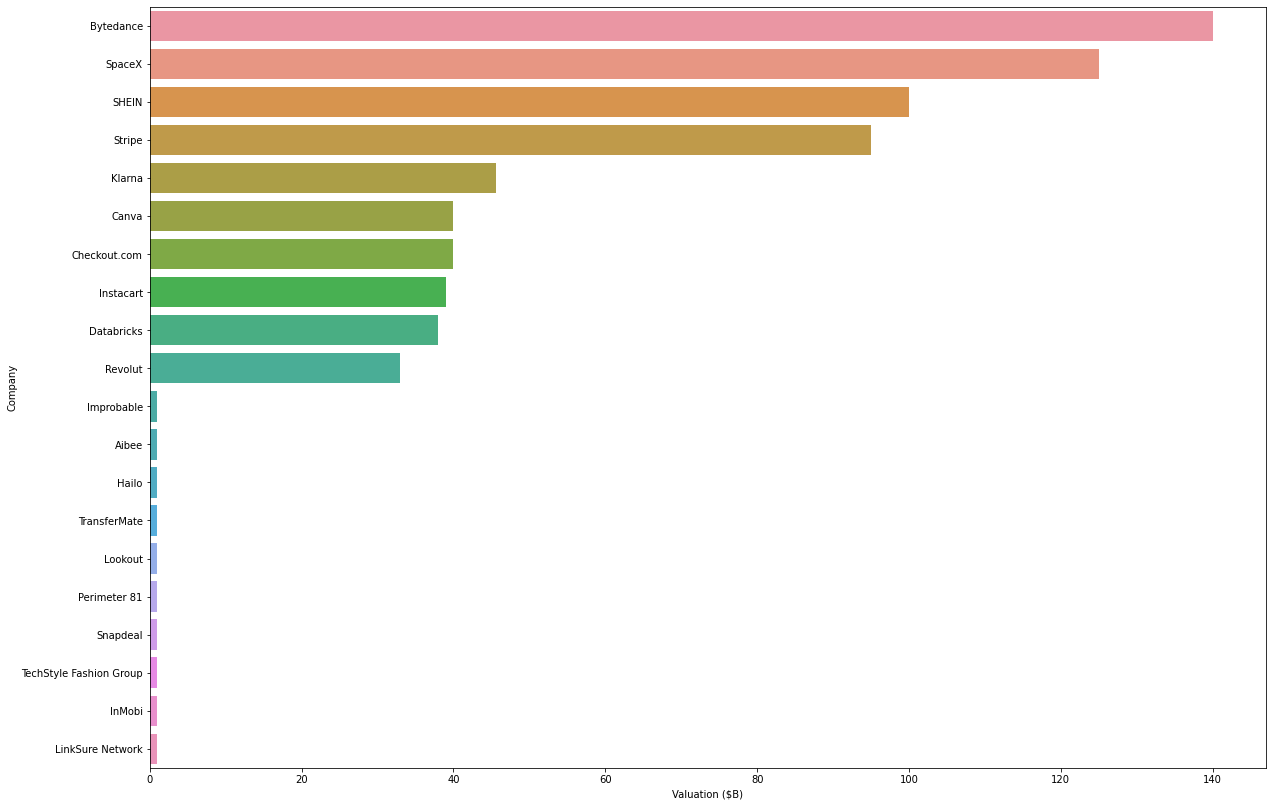

In [84]:
# Compare the 10 largest and 10 smallest unicorns
df_diff_comp_largest = df_all.nlargest(10, 'Valuation ($B)')
df_diff_comp_smallest = df_all.nsmallest(10, 'Valuation ($B)')

df_valuation_comp = df_diff_comp_largest.append(df_diff_comp_smallest, ignore_index=True)

x_valuation_comp = df_valuation_comp['Valuation ($B)']
y_valuation_comp = df_valuation_comp['Company']

val_chart, ax_vc = plt.subplots(figsize=(20,14))
sns.barplot(x=x_valuation_comp, y=y_valuation_comp, ax=ax_vc)
plt.show()

#### Target : Visualize the correlation between the current average valuation of a company with for long the company has been in the unicorn club.
**The black bar shows the actual range of valuation of all companies in that category**

In [85]:
# Calculate the number of years the company has spent in the unicorn category. (Data compared against the year 2022, so 2022 entries will have age 0)
df_all['Date_of_Entry'] = df_all['Date Joined'].apply(lambda x: str(x).split('-')[0])
df_all['Age'] = df_all['Date_of_Entry'].apply(lambda x: 2022 - int(x))

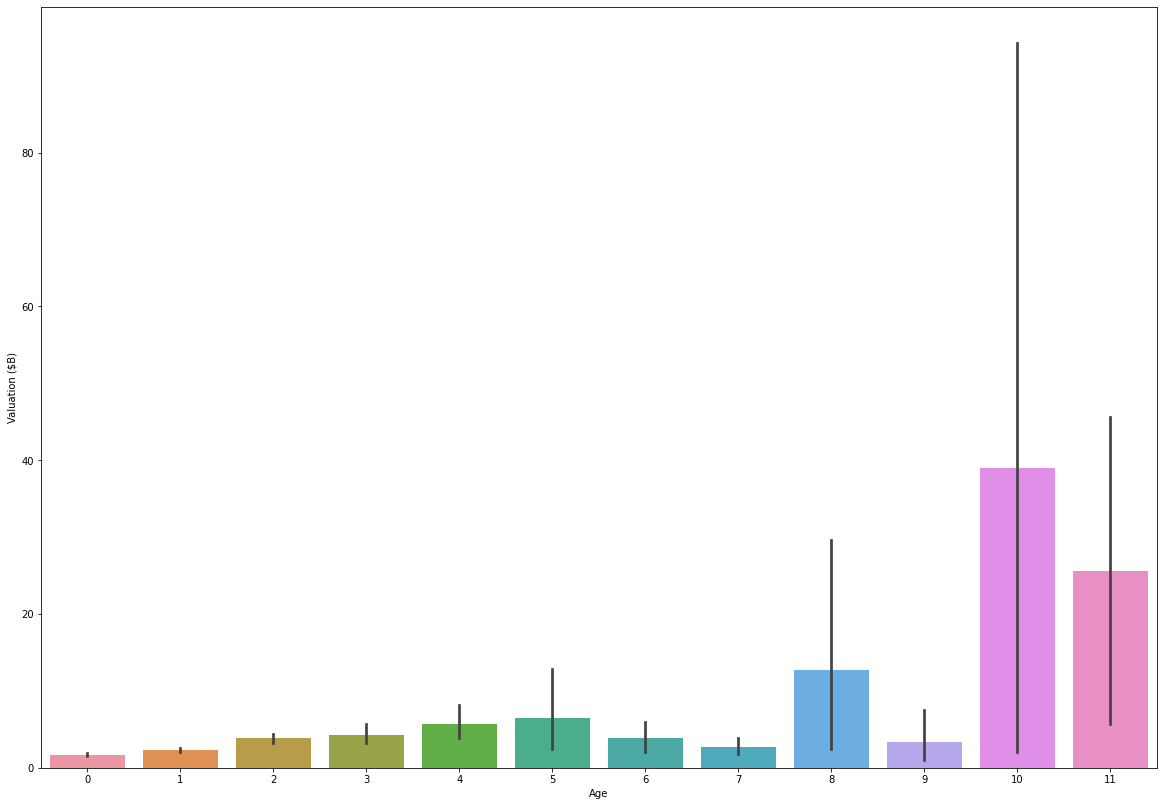

In [86]:
# Plot the graph between current average valuation and age in unicorn club
age_val_chart, ax_avc = plt.subplots(figsize=(20,14))
x_age_valuation = df_all['Age']
y_age_valuation = df_all['Valuation ($B)']
sns.barplot(x=x_age_valuation, y=y_age_valuation, ax=ax_avc)
plt.show()

In [87]:
# Categorize by valuation
def cat_by_val(val):
    dict_cat_val = {
        'XS': (1,5),
        'S' : (5,10),
        'M' : (10,20),
        'ML': (20,30),
        'L' : (30,50),
        'XL': (50,200)
    }
    for category, range in dict_cat_val.items():
        if range[0] <= val <= range[1]:
            break
    return category

df_all['company_category'] = df_all['Valuation ($B)'].apply(lambda x: cat_by_val(x))

#### Plot the number of companies by valuation category. **(The plot in on a log base 10 scale to accomodate the wide range)**
| Label | Valuation ($B) |
|-------|----------------|
| XS    | 0-5            |
| S     | 5-10           |
| M     | 10-20          |
| ML    | 20-30          |
| L     | 30-50          |
| XL    | > 50           |

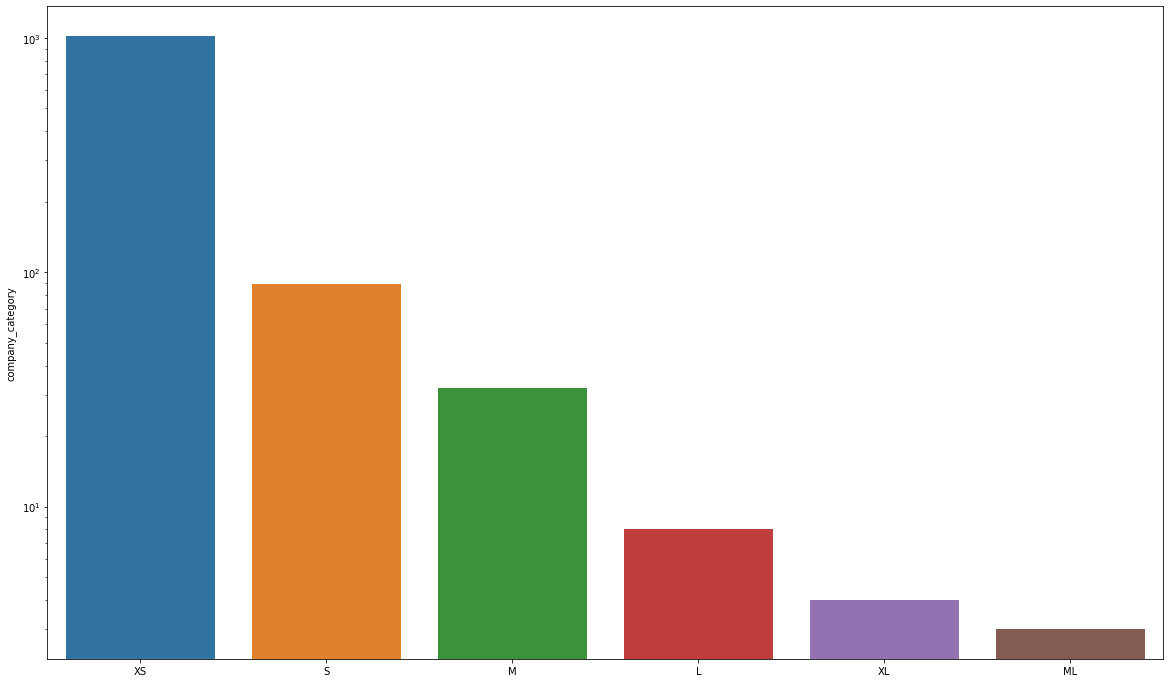

In [88]:
# Occurance of category in valuation_cat column
val_occurance = df_all['company_category'].value_counts()
val_occurance_chart, ax_voc = plt.subplots(figsize=(20,12))
x_val_occurance = val_occurance.index
sns.barplot(x=x_val_occurance, y=val_occurance, ax=ax_voc).set_yscale('log')
plt.show()

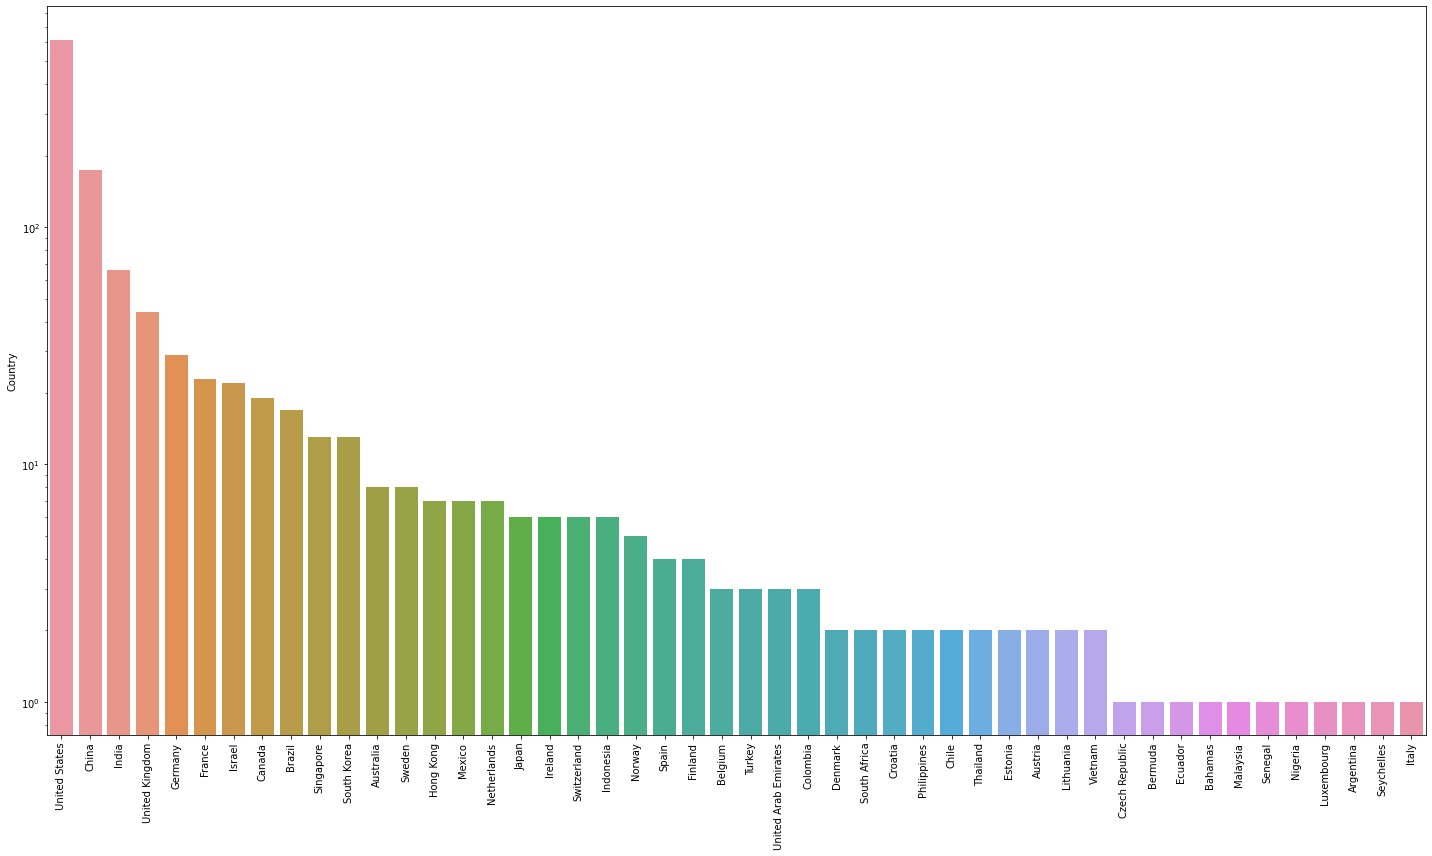

In [89]:
# Occurance of category in valuation_cat column
country_occurance = df_all['Country'].value_counts()
country_occurance_chart, ax_coc = plt.subplots(figsize=(20,12))
x_country_occurance = country_occurance.index
sns.barplot(x=x_country_occurance, y=country_occurance, ax=ax_coc).set_yscale('log')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()